# Shelf transport to offshore. 

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [22]:
def wm_day_divide(mydata):
    length =int(np.max(mydata.init_t)/24)

    bdy_loo = 0
    bdy_sou = 4
    bdy_off = 2
    bdy_nor = 3

    south = [np.sum(mydata.final_transp[(mydata.final_section==bdy_sou) & (mydata.init_t >= 1+(i*24)) & (mydata.init_t <= 1+(i*24)+23)]).values/24 for i in range(length)]
    north = [np.sum(mydata.final_transp[(mydata.final_section==bdy_nor) & (mydata.init_t >= 1+(i*24)) & (mydata.init_t <= 1+(i*24)+23)]).values/24 for i in range(length)]
    off = [np.sum(mydata.final_transp[(mydata.final_section==bdy_off) & (mydata.init_t >= 1+(i*24)) & (mydata.init_t <= 1+(i*24)+23)]).values/24 for i in range(length)]
    loop = [np.sum(mydata.final_transp[(mydata.final_section==bdy_loo) & (abs(mydata.init_t-mydata.final_t) > 24) & (mydata.init_t >= 1+(i*24)) & (mydata.init_t <= 1+(i*24)+23)]).values/24 for i in range(length)]
 
    return south, north, off, loop

In [23]:
df = xr.open_dataset("/data1/bbeutel/LO_user/ariane/metals/20170101/ariane_positions_quantitative.nc")
south, north, off, loop = wm_day_divide(df)

In [24]:
startday = dt.datetime(2017, 1, 1)
length =int((np.max(df.init_t))/24)
dates = [startday+dt.timedelta(days=i) for i in range(length)] 

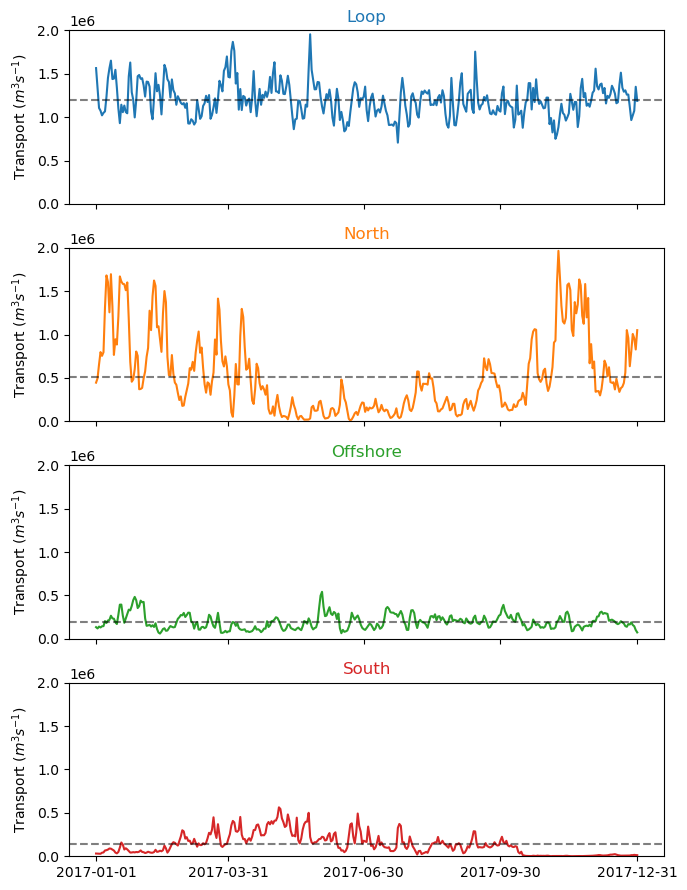

In [57]:
fig, ax = plt.subplots(4,1,figsize=[7,9])

ax[0].plot(dates,loop,c='tab:blue')
ax[0].axhline(np.mean(loop),c='k',ls='dashed',alpha=0.5)
ax[0].set_title('Loop',c='tab:blue')

ax[1].plot(dates,north,c='tab:orange')
ax[1].axhline(np.mean(north),c='k',ls='dashed',alpha=0.5)
ax[1].set_title('North',c='tab:orange')

ax[2].plot(dates,off,c='tab:green')
ax[2].axhline(np.mean(off),c='k',ls='dashed',alpha=0.5)
ax[2].set_title('Offshore',c='tab:green')

ax[3].plot(dates,south,c='tab:red')
ax[3].axhline(np.mean(south),c='k',ls='dashed',alpha=0.5)
ax[3].set_title('South',c='tab:red')


for axs in ax:
    axs.set_ylim([0,2000000])
    axs.set_xticks([dates[0],dates[89],dates[180],dates[272],dates[364]])
    axs.set_xticklabels([])
    axs.set_ylabel('Transport ($m^3 s^{-1}$)')
ax[3].set_xticklabels([str(dates[0])[:10],str(dates[89])[:10],str(dates[180])[:10],str(dates[272])[:10],str(dates[364])[:10]])

plt.tight_layout()